In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.ticker as ticker

from plotly import tools
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
# from datetime import datetime
# from datetime import timedelta

from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

init_notebook_mode(connected=True)

pd.options.display.float_format = '{:,.2f}'.format

pio.templates.default = "none"
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Exploração inicial

In [2]:
listings_source = pd.read_csv('../data/raw/simulated_listings.csv')

display(listings_source.info(),
        listings_source.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rooms             8369 non-null   float64
 1   garages           8369 non-null   float64
 2   useful_area       8369 non-null   int64  
 3   latitude          8369 non-null   float64
 4   longitude         8369 non-null   float64
 5   value             8369 non-null   int64  
 6   interior_quality  8369 non-null   int64  
 7   time_on_market    8369 non-null   float64
 8   sold              8369 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 588.6 KB


None

rooms  garages  useful_area  latitude  longitude   value  interior_quality  \
0   3.00     2.00           77    -23.62     -46.74  686126                 2   
1   1.00     1.00           35    -23.55     -46.65  675152                 3   
2   3.00     2.00           97    -23.61     -46.63  871258                 2   
3   3.00     3.00          102    -23.54     -46.57  648740                 3   
4   2.00     1.00           78    -23.59     -46.63  968643                 2   

   time_on_market  sold  
0           75.84     0  
1          215.49     0  
2           92.05     0  
3           32.00     1  
4          319.57     0

In [3]:
listings = listings_source.copy()
# df['latlong'] = df.apply(lambda x: str(x['latitude'])+','+str(x['longitude']),1)

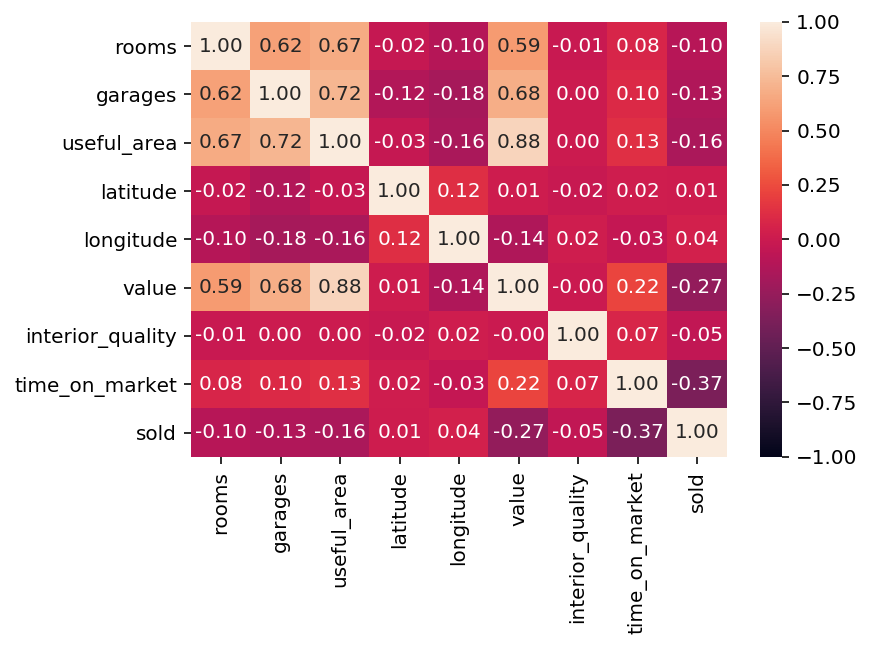

In [4]:
sns.heatmap(listings.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')
plt.show()

O gráfico de correlação acima levanta algumas questões:

1. Multicolinearidade entre variáveis de tamanho (rooms,garages,useful_area)
1. Alta correlação positiva entre tamanho e preço
1. Leve correlação negativa entre tempo no mercado e valor com a variável target

In [5]:
listings.groupby('rooms')['sold'].value_counts(normalize=True)

rooms  sold
1.00   1      0.51
       0      0.49
2.00   1      0.52
       0      0.48
3.00   0      0.53
       1      0.47
4.00   0      0.63
       1      0.37
5.00   0      0.71
       1      0.29
6.00   0      0.80
       1      0.20
7.00   0      1.00
8.00   1      1.00
Name: sold, dtype: float64

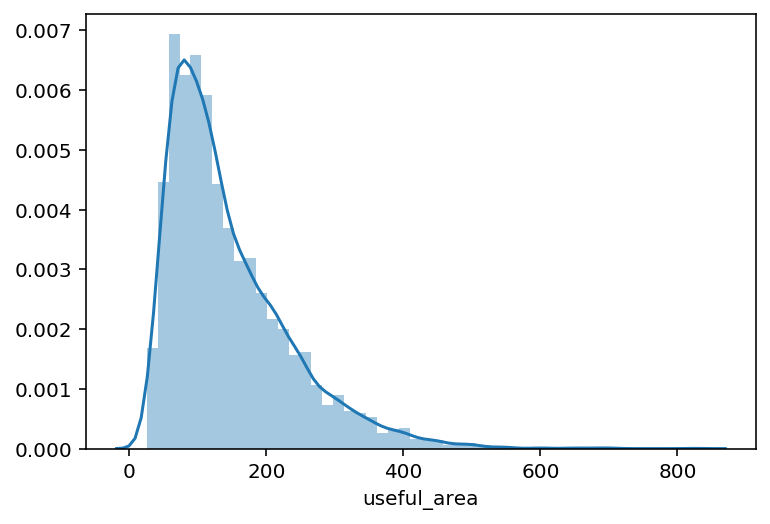

In [6]:
sns.distplot(listings['useful_area'],hist=True,kde=True)
plt.show()

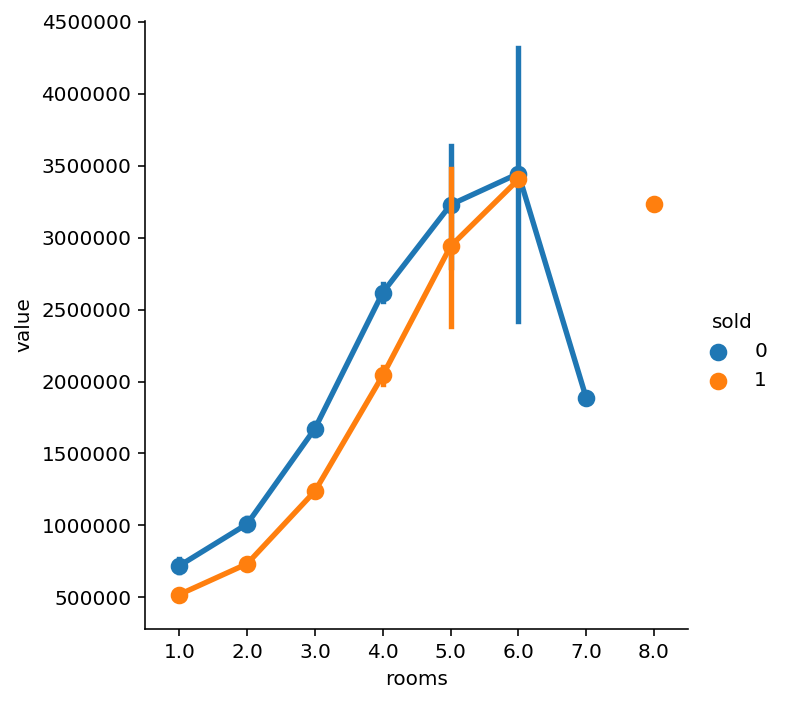

In [7]:
sns.factorplot('rooms','value',data=listings,hue='sold')

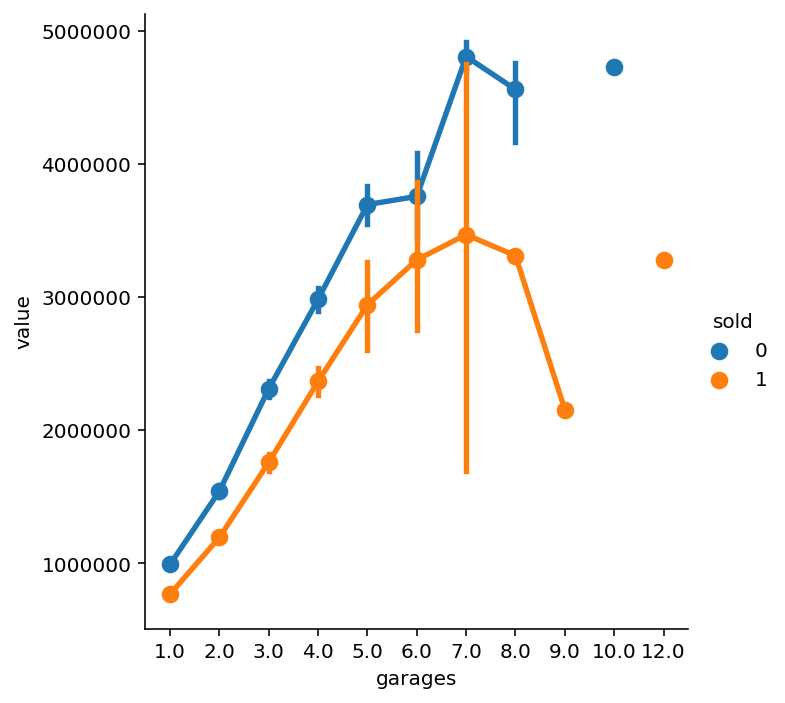

In [8]:
sns.factorplot('garages','value',data=listings,hue='sold')

In [9]:
listings.columns

Index(['rooms', 'garages', 'useful_area', 'latitude', 'longitude', 'value',
       'interior_quality', 'time_on_market', 'sold'],
      dtype='object')

In [10]:
#box plot overallqual/saleprice
qvar_list = ['rooms','garages','interior_quality']
## Log1p value
listings['value_log1p'] = np.log1p(listings['value'])
listings['value_log1p_zscore'] = stats.zscore(listings['value_log1p'])
listings['price'] = listings['value']

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

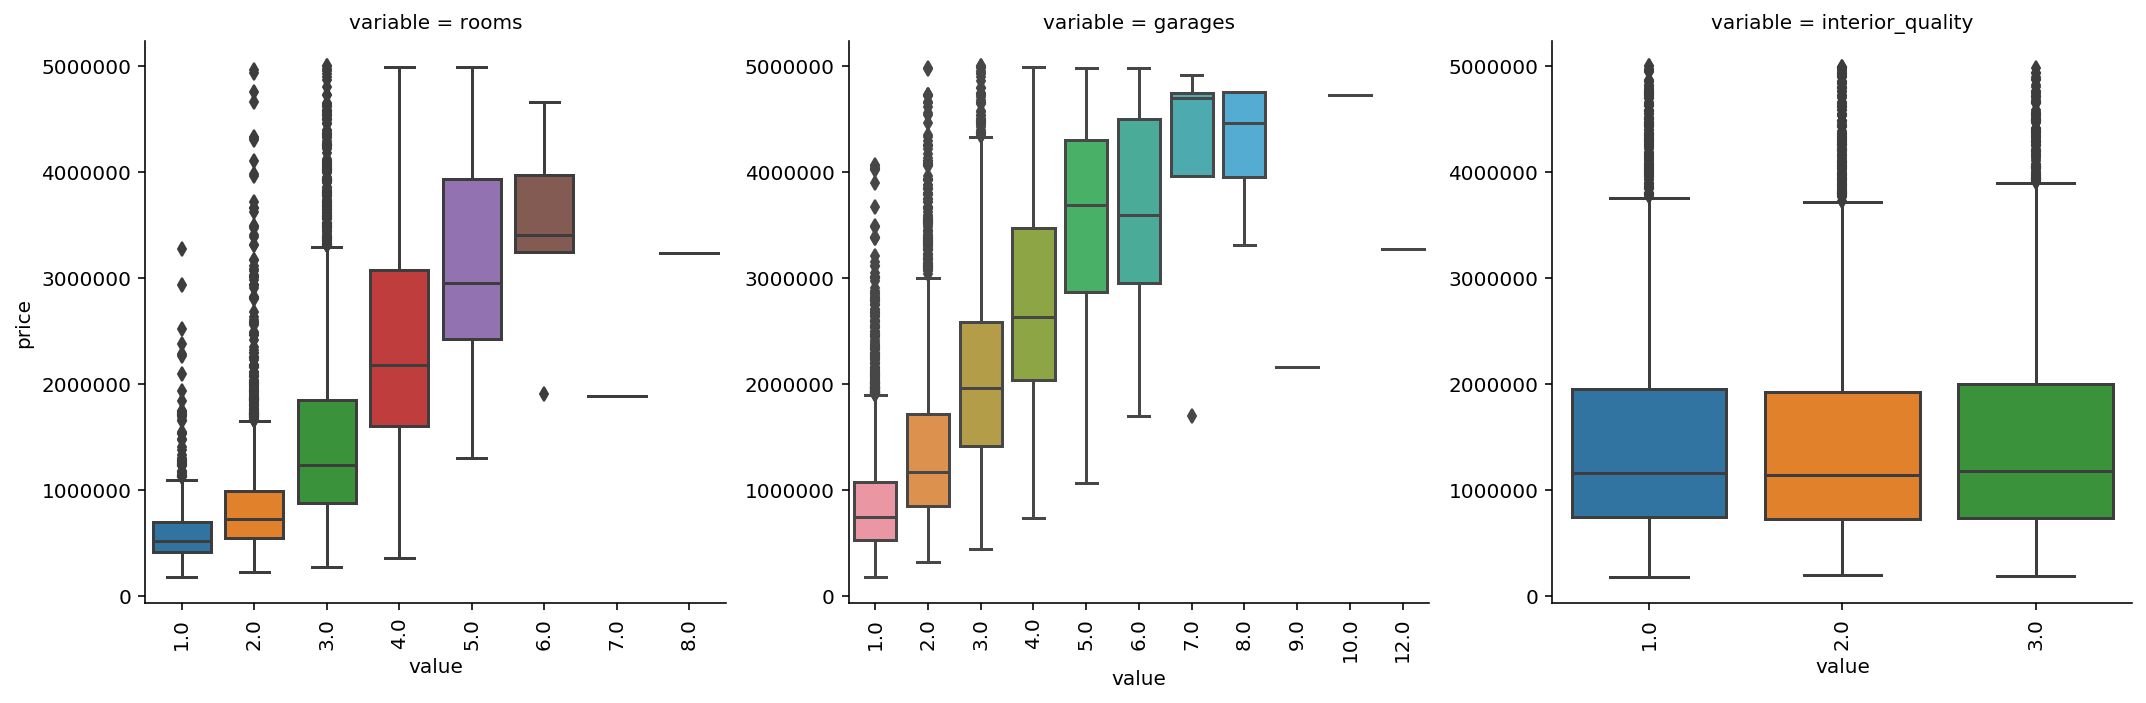

In [11]:
f = pd.melt(listings, id_vars='price', value_vars=qvar_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value","price")

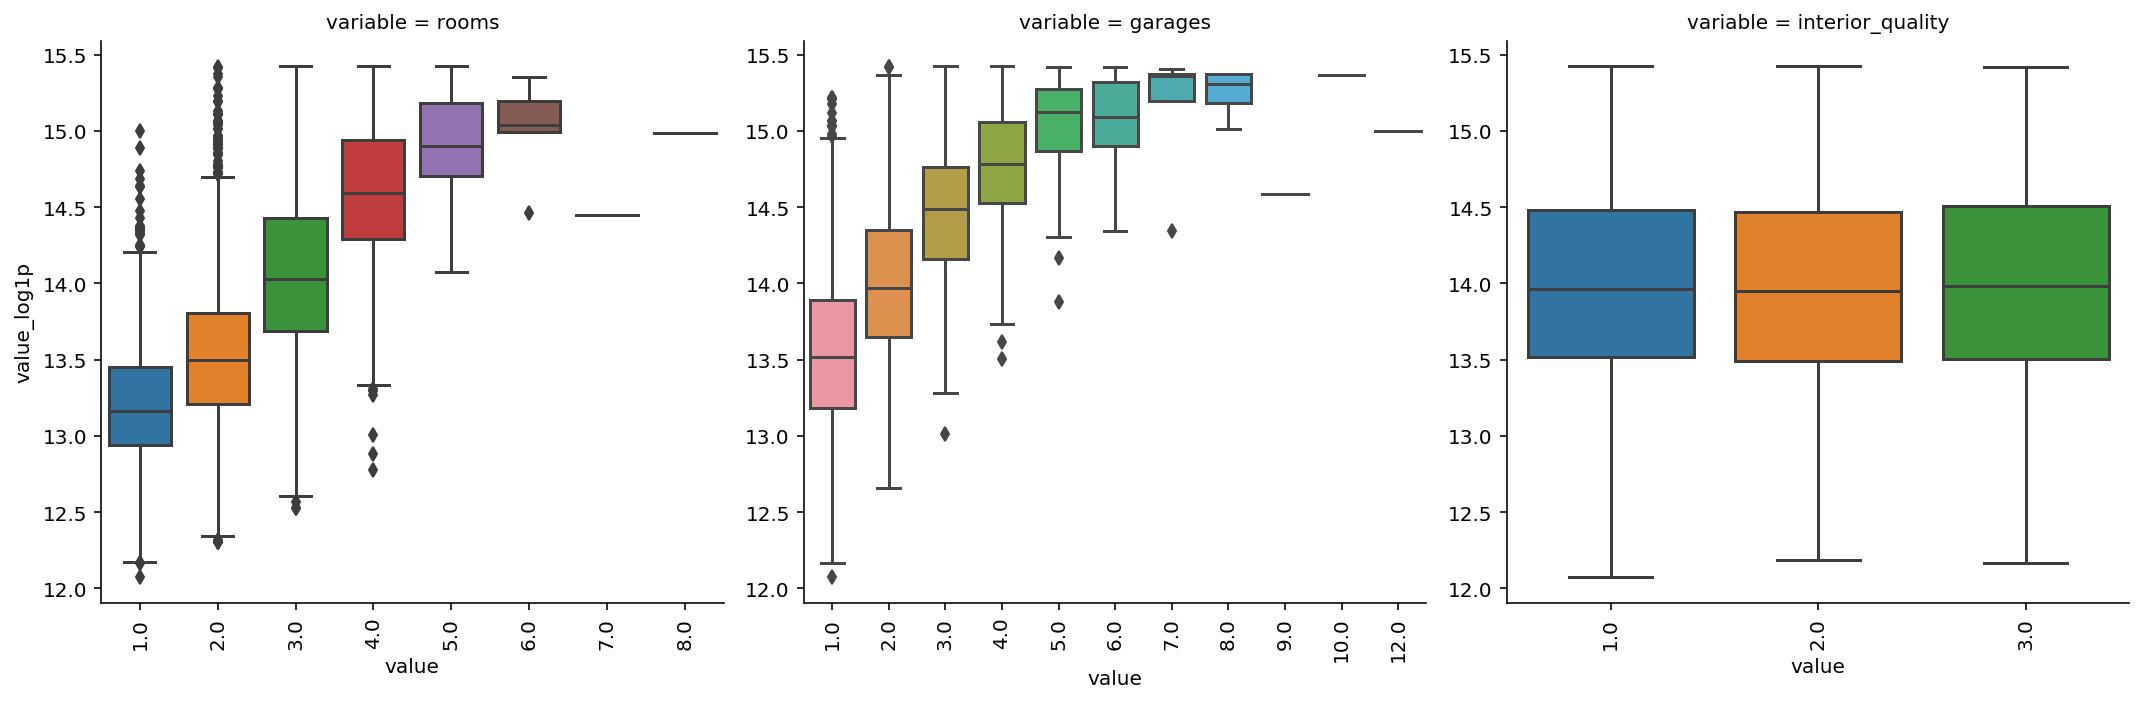

In [12]:
f = pd.melt(listings, id_vars='value_log1p', value_vars=qvar_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value","value_log1p")

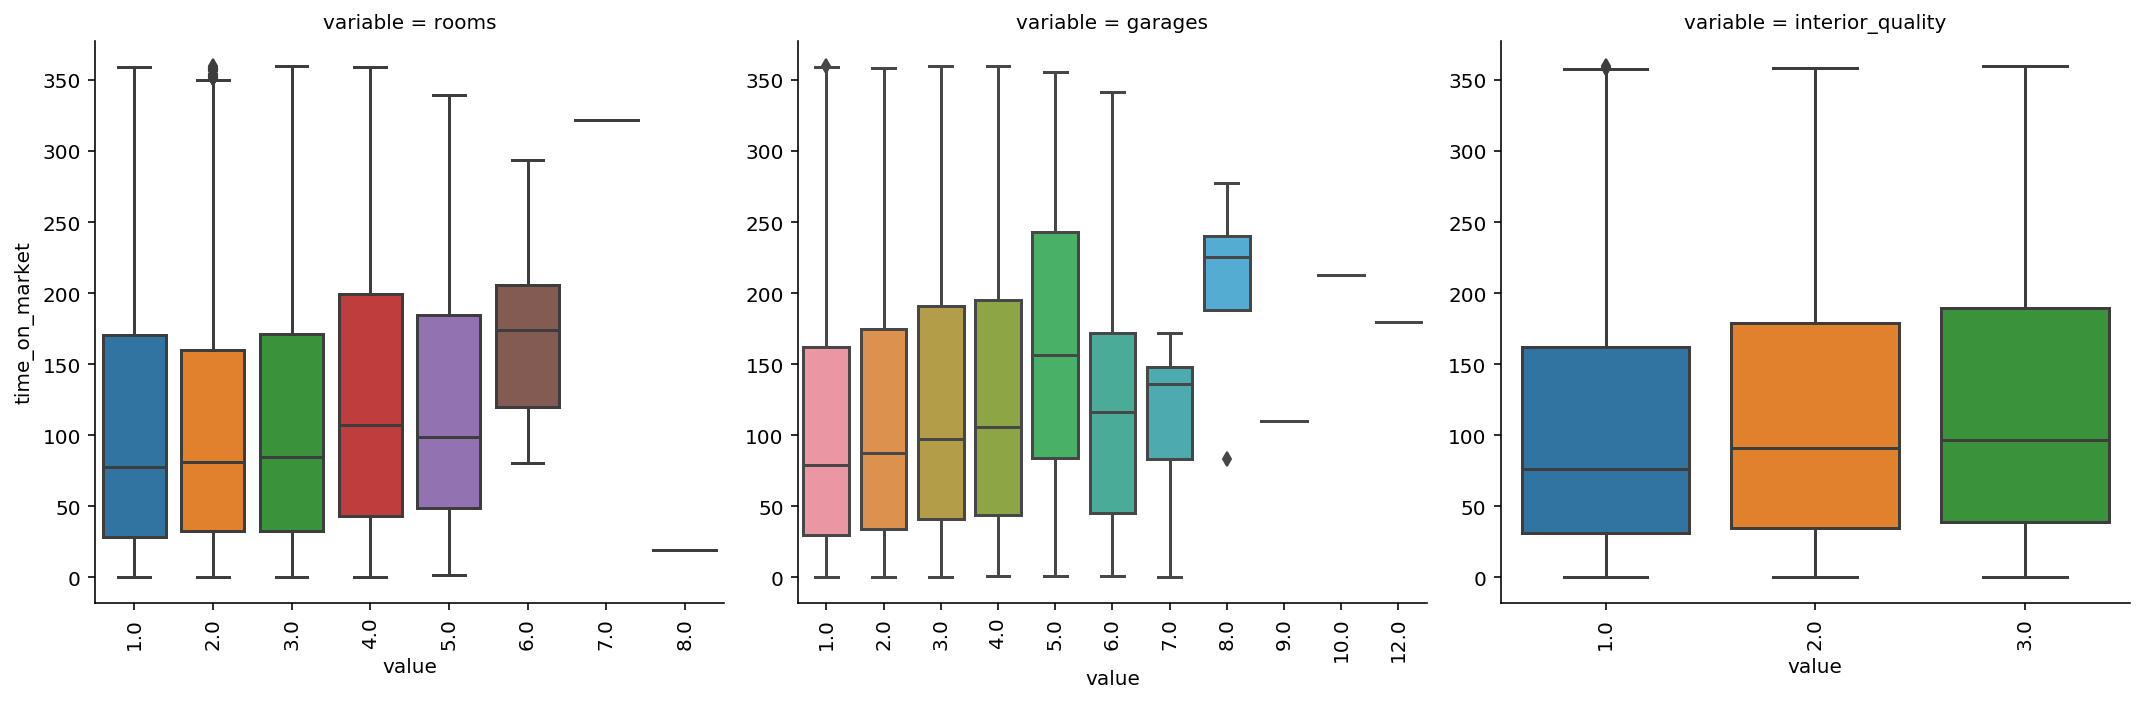

In [13]:
f = pd.melt(listings, id_vars='time_on_market', value_vars=qvar_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value","time_on_market")

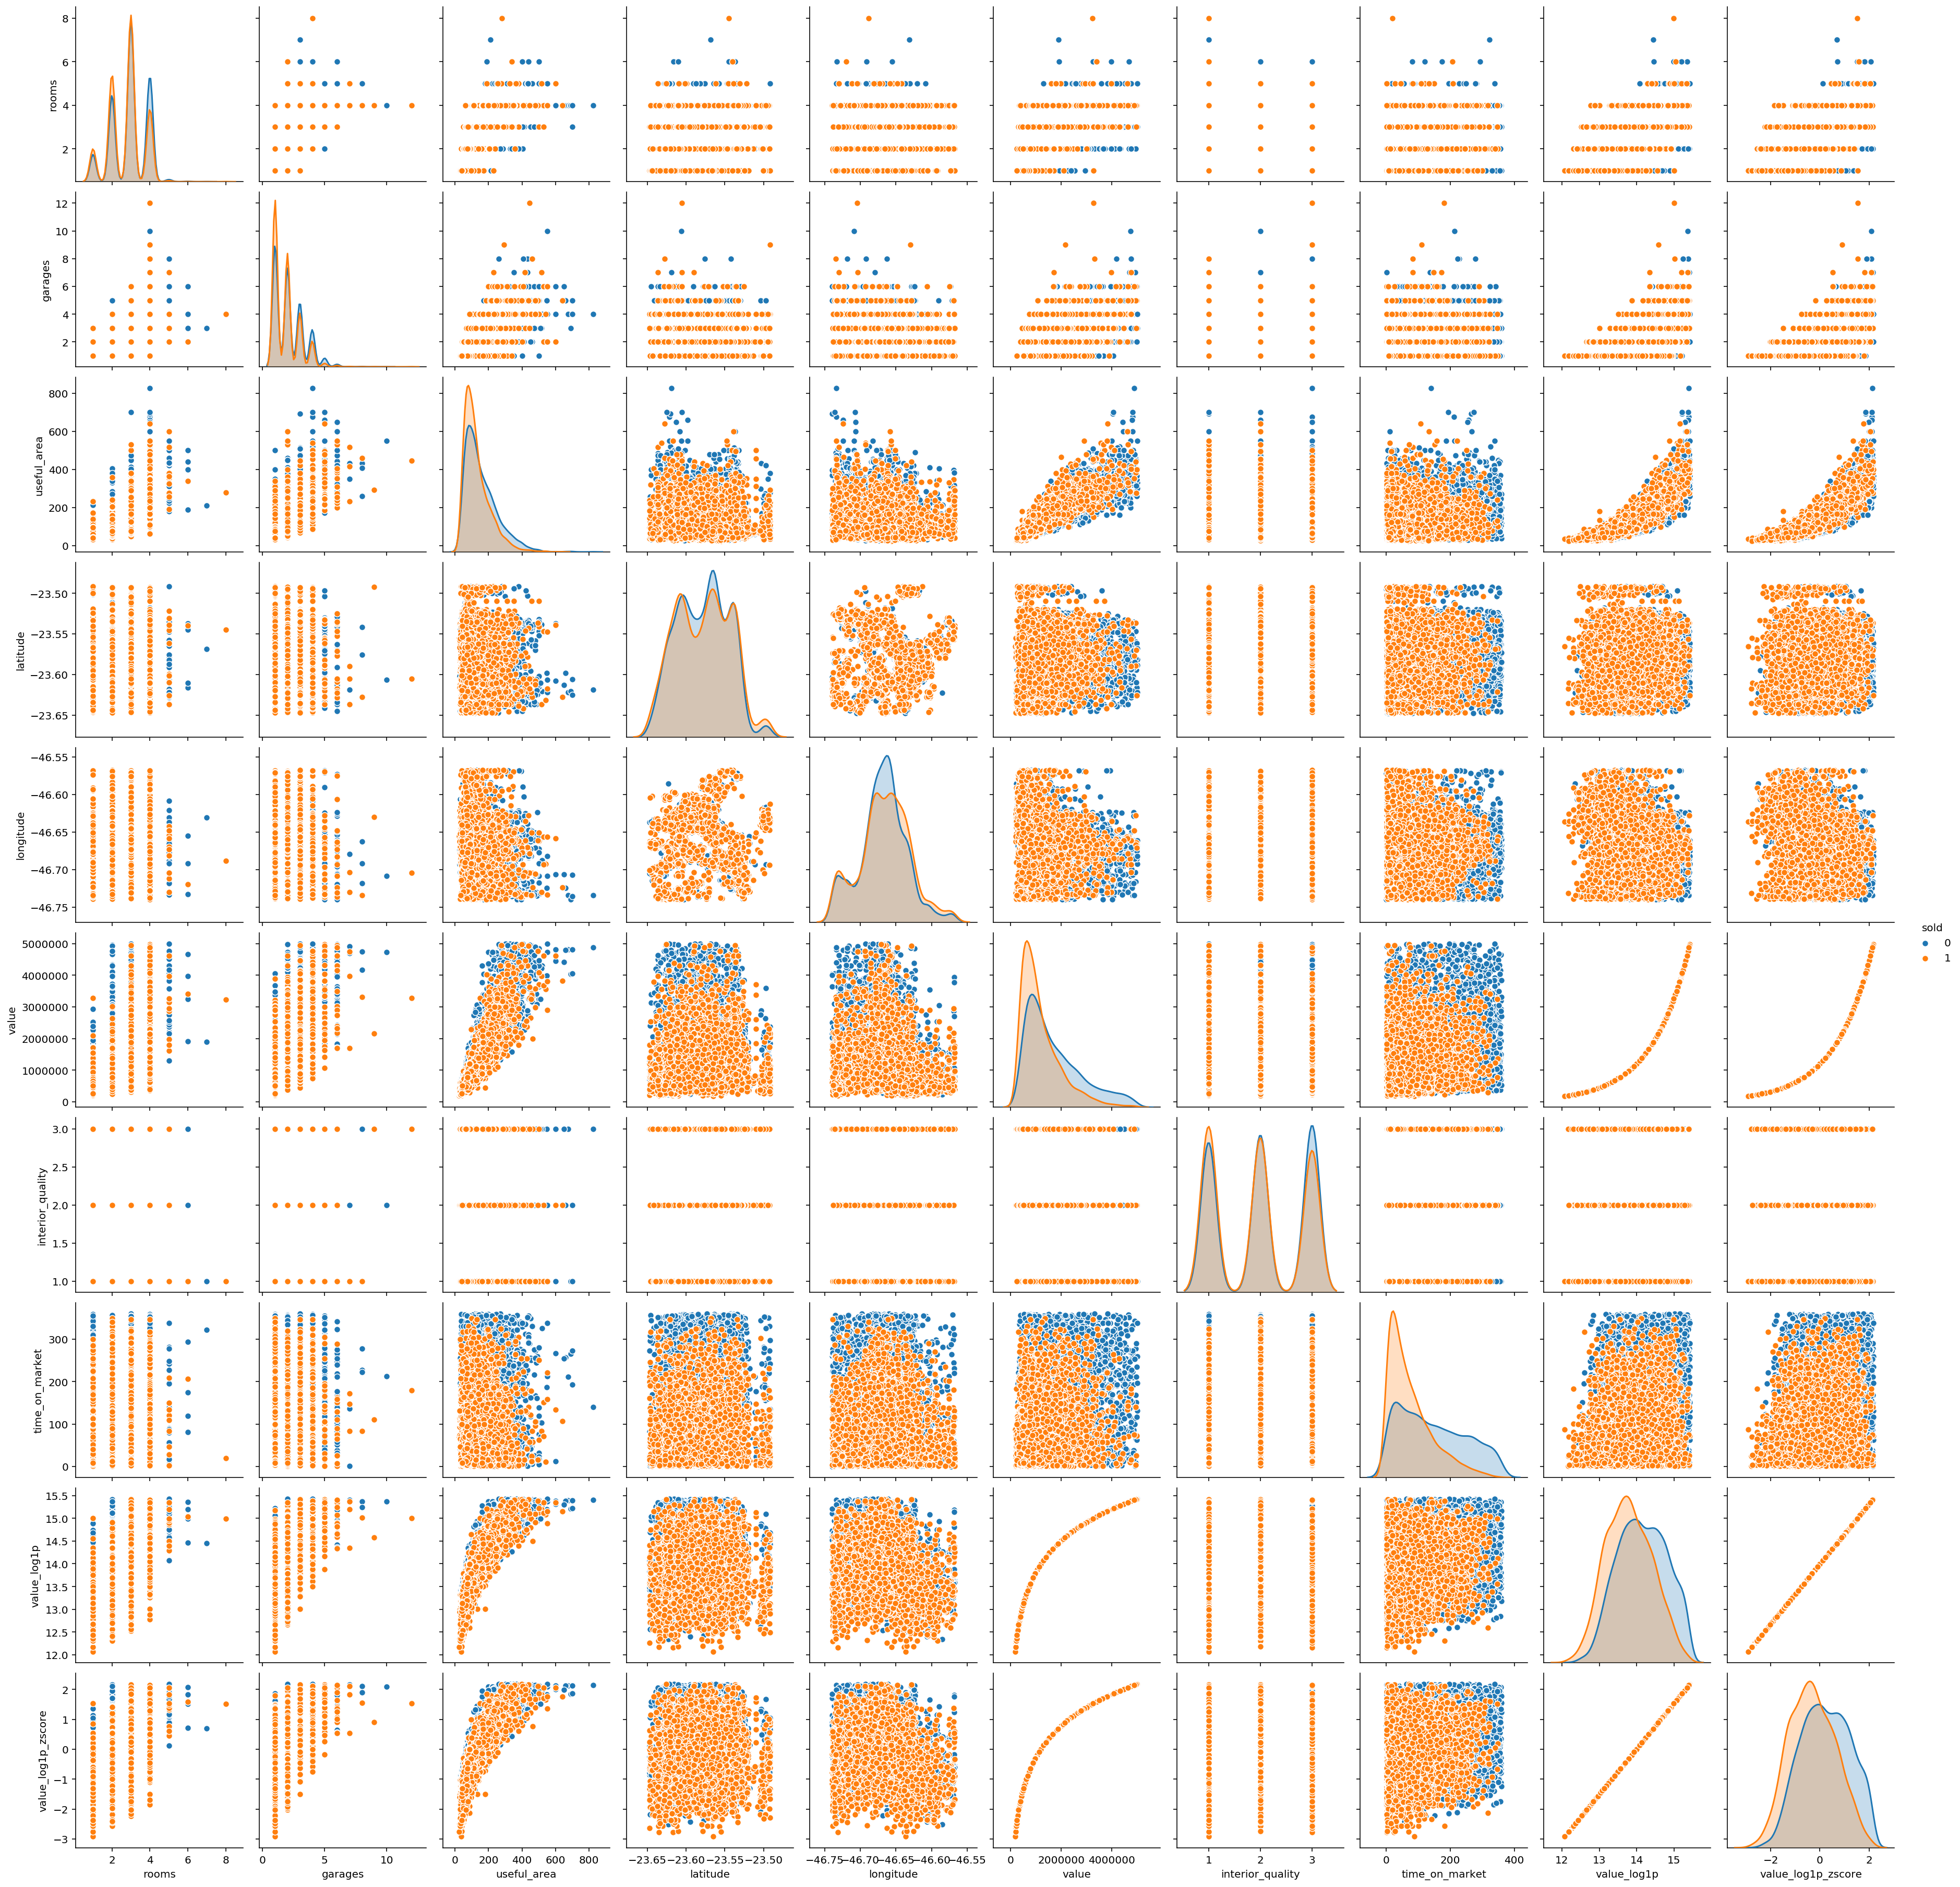

In [14]:
listings.drop('price',axis=1,inplace=True)
sns.pairplot(data=listings,hue='sold')

In [15]:
listings.groupby('interior_quality')['sold'].value_counts(normalize=True)

interior_quality  sold
1                 0      0.50
                  1      0.50
2                 0      0.53
                  1      0.47
3                 0      0.57
                  1      0.43
Name: sold, dtype: float64

In [16]:
listings.groupby('sold')['value'].mean()

sold
0   1,726,742.95
1   1,192,802.08
Name: value, dtype: float64

In [17]:
listings.groupby('rooms')['time_on_market'].mean()

rooms
1.00   107.63
2.00   107.82
3.00   111.70
4.00   129.27
5.00   123.01
6.00   174.81
7.00   322.08
8.00    19.00
Name: time_on_market, dtype: float64

In [18]:
listings[listings['rooms'] >= 7]

rooms  garages  useful_area  latitude  longitude    value  \
1444   7.00     3.00          210    -23.57     -46.63  1886480   
4110   8.00     4.00          280    -23.54     -46.69  3234750   

      interior_quality  time_on_market  sold  value_log1p  value_log1p_zscore  
1444                 1          322.08     0        14.45                0.69  
4110                 1           19.00     1        14.99                1.51

Ainda que os datasets pareçam ter sido balanceados em termos de valor vs qualidade do interior, aparentemente apartamentos no maior nível (3) apresentam maior dificuldade na venda.

## Verificar possível outlier no imóvel de 8 quartos que só levou 19 dias pra vender

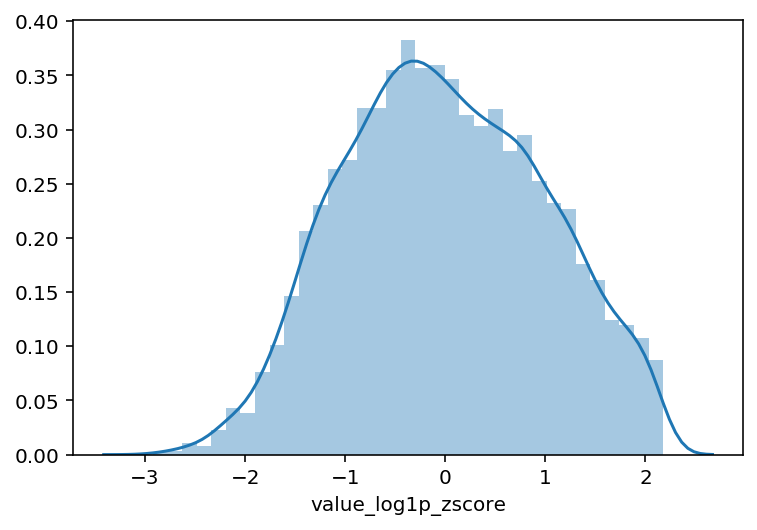

In [19]:
sns.distplot(listings['value_log1p_zscore'])

## Feature-egineering

In [20]:
## Bin em quinzenas
bins = [15*x for x in range((360//15)+1)]
listings['time_on_market_agg'] = pd.cut(listings['time_on_market'],bins)

## Log1p value
listings['value_log1p'] = np.log1p(listings['value'])

In [21]:
listings.interior_quality.value_counts()

1    2811
2    2786
3    2772
Name: interior_quality, dtype: int64

In [23]:
sold = listings[listings['sold']==1]

df = pd.DataFrame(sold['time_on_market_agg'].value_counts(normalize=True))

df['rank'] = np.arange(len(df))

df.reset_index(inplace=True)

In [22]:
listings

rooms  garages  useful_area  latitude  longitude    value  \
0      3.00     2.00           77    -23.62     -46.74   686126   
1      1.00     1.00           35    -23.55     -46.65   675152   
2      3.00     2.00           97    -23.61     -46.63   871258   
3      3.00     3.00          102    -23.54     -46.57   648740   
4      2.00     1.00           78    -23.59     -46.63   968643   
...     ...      ...          ...       ...        ...      ...   
8364   2.00     1.00           78    -23.58     -46.68   998382   
8365   2.00     1.00           66    -23.62     -46.64   534478   
8366   4.00     4.00          263    -23.50     -46.64  2214300   
8367   1.00     1.00           43    -23.62     -46.67   419539   
8368   1.00     1.00           40    -23.62     -46.64   252295   

      interior_quality  time_on_market  sold  value_log1p  value_log1p_zscore  \
0                    2           75.84     0        13.44               -0.84   
1                    3          215.49     0        13.42               -0.87   
2                    2           92.05     0        13.68               -0.48   
3                    3           32.00     1        13.38               -0.93   
4                    2          319.57     0        13.78               -0.32   
...                ...             ...   ...          ...                 ...   
8364                 1          328.75     0        13.81               -0.27   
8365                 2          331.34     0        13.19               -1.22   
8366                 1           66.53     0        14.61                0.94   
8367                 2          276.05     0        12.95               -1.59   
8368                 1          100.00     1        12.44               -2.37   

     time_on_market_agg  
0              (75, 90]  
1            (210, 225]  
2             (90, 105]  
3              (30, 45]  
4            (315, 330]  
...                 ...  
8364         (315, 330]  
8365         (330, 345]  
8366           (60, 75]  
8367         (270, 285]  
8368          (90, 105]  

[8369 rows x 12 columns]

In [24]:
## Pareto time_on_market_agg
sold = listings[listings['sold']==1]

df = pd.DataFrame(sold['time_on_market_agg'].value_counts(normalize=True))

df['rank'] = np.arange(len(df))

df.reset_index(inplace=True)


df['time_on_market_agg'] = df['time_on_market_agg'] * 100
df['cum'] = df['time_on_market_agg'].cumsum()

df['rank'] = df['index'].map(str) #+ " importance_gain"

trace1 = dict(type='bar',
              x=df['rank'],
              y=df['time_on_market_agg'],
              marker=dict(color='#FE8003'),
              name='Feature',
              opacity=0.8)

trace2 = dict(type='scatter',
              x=df['rank'],
              y=df['cum'],
              marker=dict(color='#29B6F6'),
              line=dict(color= '#29B6F6', width= 1.5),
              name='Cumulativa',
              xaxis='x1', 
              yaxis='y2')

trace3 = dict(type='scatter',
              x=[8,8],
              y=[0,100],
              marker=dict(color='grey'),
              mode='lines',
              name='Qtd. Features',
              line=dict(width=1,dash='dash'),
              opacity=0.8,
              xaxis='x3', 
              yaxis='y2',
              hoverinfo=['skip','x'])


data = [trace1, trace2, trace3]



layout = go.Layout(legend= dict(orientation="h"),
                   yaxis=dict(title='Percentual vendido',
                                           titlefont=dict(color="#FE8003")),
                   yaxis2=dict(title='Percentual vendido acumulado',
                               titlefont=dict(color='#29B6F6'),
                               range=[0,101],
                               overlaying='y',
                               anchor='x',
                               side='right'),
                   xaxis3=dict(overlaying='x',
                               anchor='y',
                               range=[0, df.time_on_market_agg.shape[0]],
                               side='left')
)

fig = go.Figure(data=data, layout=layout)
fig.update_yaxes(ticksuffix="%")
fig['layout']['yaxis2']['showgrid'] = False
fig['layout']['xaxis3']['showticklabels'] = False

fig.update_layout(width=1500,height=800, showlegend=False,margin=dict(b=200))
fig.update_xaxes({"tickfont": {"size": 10}})

iplot(fig, filename="pareto")

In [25]:
listings.to_csv('../data/interim/simulated.csv',index=False)